## install and use packages

In [15]:
import Pkg
Pkg.add(["LIBSVM", "RDatasets", "MLBase", "Plots", "StatsPlots"])

   Resolving package versions...
   Installed TableOperations ─── v1.0.0
   Installed StatsPlots ──────── v0.14.21
   Installed Arpack ──────────── v0.4.0
   Installed Arpack_jll ──────── v3.5.0+3
   Installed Widgets ─────────── v0.6.3
   Installed DataValues ──────── v0.4.13
   Installed MultivariateStats ─ v0.8.0
   Installed NearestNeighbors ── v0.4.8
   Installed Clustering ──────── v0.14.2
    Updating `~/SageMaker/envs/julia/depot/environments/v1.6/Project.toml`
  [f3b207a7] + StatsPlots v0.14.21
    Updating `~/SageMaker/envs/julia/depot/environments/v1.6/Manifest.toml`
  [7d9fca2a] + Arpack v0.4.0
  [aaaa29a8] + Clustering v0.14.2
  [e7dc6d0d] + DataValues v0.4.13
  [6f286f6a] + MultivariateStats v0.8.0
  [b8a86587] + NearestNeighbors v0.4.8
  [f3b207a7] + StatsPlots v0.14.21
  [ab02a1b2] + TableOperations v1.0.0
  [cc8bc4a8] + Widgets v0.6.3
  [68821587] + Arpack_jll v3.5.0+3
Precompiling project...
  ✓ DataValues
  ✓ Arpack_jll
  ✓ NearestNeighbors
  ✓ TableOperations
  ✓ Ar

In [1]:
using RDatasets
using MLBase
using StatsPlots
using Random
using LIBSVM

## Load Iris dataset

In [2]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


## Visualizing features distribution

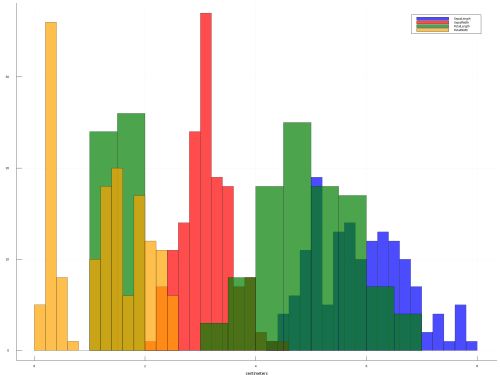

In [3]:
plt = histogram(iris.SepalLength, nbins=20, c="blue", label="SepalLength", xlabel="centimeters", ylabel="Frequency", alpha=0.7,size=(2000, 1500))
plt = histogram!(iris.SepalWidth, nbins=20, c="red", label="SepalWidth", alpha=0.7,size=(2000, 1500))
plt = histogram!(iris.PetalLength, nbins=20, c="green", label="PetalLength", alpha=0.7,size=(2000, 1500))
plt = histogram!(iris.PetalWidth, nbins=20, c="orange", label="PetalWidth", alpha=0.7,size=(2000, 1500))
savefig(plt, "img/histogram_1.png")
display(plt)

## Pairplot

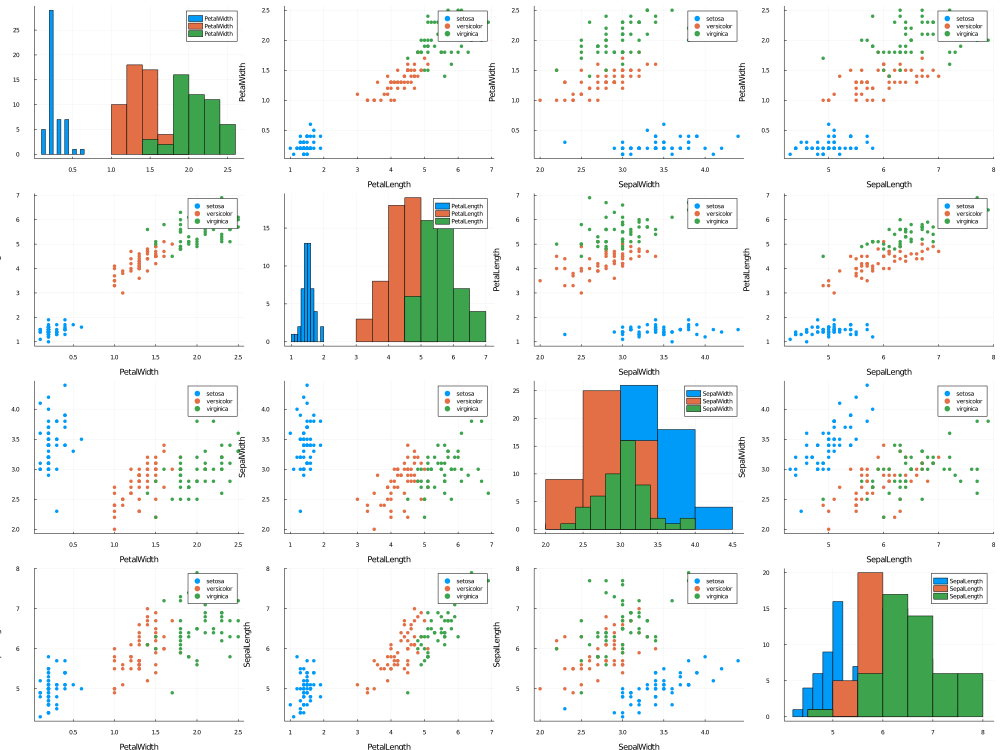

In [4]:
plots = [[], [], [], []]
for (i, yaxis) in enumerate(["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])
    for (j, xaxis) in enumerate(["PetalWidth", "PetalLength", "SepalWidth", "SepalLength"])
        if i == 5 - j
            push!(plots[i], histogram(iris[!, yaxis], label=yaxis, size=(2000, 1500), dpi=200, group =iris.Species))
        else
            push!(plots[i], scatter(iris[!, xaxis], iris[!, yaxis], group =iris.Species, size=(2000, 1500), markerstrokewidth=0, dpi=200, xlabel=xaxis, ylabel=yaxis))
        end
    end
end

l = @layout [a b c d ; e f g h ; i j k l ; m n o p]

plt =  plot(plots[4][1], plots[4][2], plots[4][3], plots[4][4], 
            plots[3][1], plots[3][2], plots[3][3], plots[3][4], 
            plots[2][1], plots[2][2], plots[2][3], plots[2][4], 
            plots[1][1], plots[1][2], plots[1][3], plots[1][4], layout = l)
savefig(plt, "img/pairplot_1.png")
display(plt)

## Exctract features and label as two arrays

In [83]:
X = Matrix(iris[:,1:4])
irislabels = iris[:,5]

150-element CategoricalArrays.CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [84]:
X

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

## Encode species name to 1,2,3 labels 

In [85]:
irislabelsmap = labelmap(irislabels)
y = labelencode(irislabelsmap, irislabels)

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

## Split dataset to train and test set

In [86]:
trainids = randsubseq(1:length(y), 0.7)
testids = setdiff(1:length(y), trainids)

51-element Vector{Int64}:
   1
   2
   4
   6
   9
  12
  15
  16
  19
  23
  26
  28
  30
   ⋮
 109
 114
 115
 124
 126
 131
 132
 133
 139
 141
 147
 148

In [87]:
X_train = X[trainids,:]
y_train = y[trainids]

X_test = X[testids,:]
y_test = y[testids]

51-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

## Support Vector Machine using LIBSVM package

In [88]:
model = svmtrain(X_train', y_train)

LIBSVM.SVM{Int64}(SVC, LIBSVM.Kernel.RadialBasis, nothing, 4, 3, [1, 2, 3], Int32[1, 2, 3], Float64[], Int32[], LIBSVM.SupportVectors{Int64, Float64}(34, Int32[3, 16, 15], [1, 1, 1, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [4.8 5.5 … 5.8 5.9; 3.4 4.2 … 2.7 3.0; 1.9 1.4 … 5.1 5.1; 0.2 0.2 … 1.9 1.8], Int32[15, 19, 26, 33, 35, 36, 38, 43, 45, 46  …  78, 80, 83, 84, 86, 87, 88, 93, 94, 99], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 4.8), LIBSVM.SVMNode(1, 5.5), LIBSVM.SVMNode(1, 4.5), LIBSVM.SVMNode(1, 7.0), LIBSVM.SVMNode(1, 6.9), LIBSVM.SVMNode(1, 4.9), LIBSVM.SVMNode(1, 5.0), LIBSVM.SVMNode(1, 5.6), LIBSVM.SVMNode(1, 5.9), LIBSVM.SVMNode(1, 6.8)  …  LIBSVM.SVMNode(1, 6.0), LIBSVM.SVMNode(1, 5.6), LIBSVM.SVMNode(1, 6.2), LIBSVM.SVMNode(1, 6.1), LIBSVM.SVMNode(1, 7.2), LIBSVM.SVMNode(1, 6.3), LIBSVM.SVMNode(1, 6.1), LIBSVM.SVMNode(1, 6.9), LIBSVM.SVMNode(1, 5.8), LIBSVM.SVMNode(1, 5.9)]), 0.0, [0.5997439700401149 0.0; 0.5448567172502432 0.9189942311037007; … ; -0.0 -1.0; -0.0 -1.0],

## Evaluate our model on test set

### Accuracy (%)

In [89]:
predictions_SVM, decision_values = svmpredict(model, X_test')

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 3, 3, 3, 3, 2, 3, 3, 3], [1.1945723115737221 1.1807379734543635 … -0.9599910467090015 -0.8997069675778819; 1.1516288636893384 1.1492604731416436 … -1.049773422319483 -1.0674207330028485; 0.12962436594130272 0.14019086488149962 … -0.6447579779580352 -0.7960732294657643])

In [90]:
mean(predictions_SVM .== y_test) * 100

98.0392156862745

In [91]:
predictions_SVM, decision_values = svmpredict(model, X_train')

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1.2271868360058114 1.1993057446512223 … -0.7095515248264922 -0.9492935717875696; 1.1424424889317946 1.1404151375985756 … -1.0127226892095706 -1.0725349670481275; 0.07811697227736278 0.11101897829833751 … -1.2382541430877398 -0.530851193166871])

In [92]:
mean(predictions_SVM .== y_train) * 100

98.98989898989899